In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.6.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/phrmanager7/anaconda3

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |    h1de35cc_1002         3.0 MB  conda-forge

The following packages will be UPDATED:

    openssl: 1.0.2p-h470a237_2 conda-forge --> 1.0.2p-h1de35cc_1002 conda-forge


openssl 1.0.2p: ######################################################## | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.6.0

Please update conda by running

    $ conda updat

In [219]:
# data about seoul road => it is written in Korean and cannot access by one web sources
df=pd.read_csv('seoul_data.csv',skiprows=1)
df.head()

,Unnamed: 0,Name,Population,Area,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($)
0,NaN,Dobong-gu (도봉구),"355,712",20.70 km²,17184/km²,4500.0,1330.0,490.0
1,NaN,Dongdaemun-gu (동대문구; 東大門區),"376,319",14.21 km²,26483/km²,3700.0,1310.0,510.0
2,NaN,Dongjak-gu (동작구; 銅雀區),"419,261",16.35 km²,25643/km²,4350.0,1370.0,1300.0
3,NaN,Eunpyeong-gu (은평구; 恩平區),"503,243",29.70 km²,16944/km²,4300.0,1300.0,590.0
4,NaN,Gangbuk-gu (강북구; 江北區),"338,410",23.60 km²,14339/km²,3800.0,1190.0,680.0


In [220]:
df=df.drop('Unnamed: 0', axis=1)
df.rename(columns={'Name':'District'}, inplace=True)

In [221]:
# data wrangling
df.head()
df['District']=df['District'].astype('str')
district_eng=[]
for i in range(0,len(df['District'].str.split())):
    j=df['District'].str.split()[i][0]
    district_eng.append(j)
district_eng
#convert district name into english only
df['District']=district_eng
df=df.drop([25])
#drop the tail data and the size of Area data since it doesn't provide meaningful information
df.drop('Area', axis=1, inplace=True)

In [222]:
df['District']=df['District'].astype(str)+', Seoul'
df

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($)
0,"Dobong-gu, Seoul","355,712",17184/km²,4500.0,1330.0,490.0
1,"Dongdaemun-gu, Seoul","376,319",26483/km²,3700.0,1310.0,510.0
2,"Dongjak-gu, Seoul","419,261",25643/km²,4350.0,1370.0,1300.0
3,"Eunpyeong-gu, Seoul","503,243",16944/km²,4300.0,1300.0,590.0
4,"Gangbuk-gu, Seoul","338,410",14339/km²,3800.0,1190.0,680.0
5,"Gangdong-gu, Seoul","481,332",19574/km²,4900.0,1320.0,690.0
6,"Gangnam-gu, Seoul","583,446",14771/km²,5000.0,1950.0,880.0
7,"Gangseo-gu, Seoul","591,653",14281/km²,4600.0,1480.0,700.0
8,"Geumcheon-gu, Seoul","258,030",19818/km²,3900.0,1190.0,730.0
9,"Guro-gu, Seoul","457,131",22720/km²,4250.0,1370.0,850.0


In [223]:
#call the geospatial data of Seoul

address = 'Seoul, South Korea'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seoul are {}, {}.'.format(latitude, longitude))

/Users/phrmanager7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinate of Seoul are 37.5666791, 126.9782914.


In [224]:
#address = 'Gangseo-gu, Seoul'

#geolocator = Nominatim()
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinate of Seoul are {}, {}.'.format(latitude, longitude))

/Users/phrmanager7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Seoul are 37.5583396, 126.832201.


In [226]:
#geolocator=Nominatim()
#lat_data=[]
#long_data=[]
#address=[]
#for address in df['District']:
#    location=geolocator.geocode(address)
#    latitude=location.latitude
#    longitude=location.longitude
#    print('The geograpical coordinate of',address,'are {}, {}.'.format(latitude, longitude))
    

/Users/phrmanager7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


The geograpical coordinate of Dobong-gu, Seoul are 37.6664869, 127.0305964.
The geograpical coordinate of Dongdaemun-gu, Seoul are 37.5831859, 127.0551056.
The geograpical coordinate of Dongjak-gu, Seoul are 37.5030558, 126.9547363.
The geograpical coordinate of Eunpyeong-gu, Seoul are 37.6164045, 126.9288575.
The geograpical coordinate of Gangbuk-gu, Seoul are 37.6404953, 127.009235.
The geograpical coordinate of Gangdong-gu, Seoul are 37.5470704, 127.1419035.
The geograpical coordinate of Gangnam-gu, Seoul are 37.50059, 127.050775.
The geograpical coordinate of Gangseo-gu, Seoul are 37.5583396, 126.832201.
The geograpical coordinate of Geumcheon-gu, Seoul are 37.4600965, 126.9016264.
The geograpical coordinate of Guro-gu, Seoul are 37.4985537, 126.8591834.
The geograpical coordinate of Gwanak-gu, Seoul are 37.4672582, 126.9482884.
The geograpical coordinate of Gwangjin-gu, Seoul are 37.5447483, 127.0809426.
The geograpical coordinate of Jongno-gu, Seoul are 37.5803102, 126.9830792.
T

In [227]:
geolocator=Nominatim()
lat_data=[]
long_data=[]
data_address=[]
for address in df['District']:
    location=geolocator.geocode(address)
    latitude=location.latitude
    longitude=location.longitude
    lat_data.append(latitude)
    long_data.append(longitude)
    data_address.append(address)
   
    

/Users/phrmanager7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [228]:
#add coordinates of location of districts

df['latitude']=lat_data
df['longitude']=long_data
df
#df['ppl_density(/km²)']=df['Population density'].str.replace('/km²','')
#df.drop('Population density', axis=1, inplace=True )

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),latitude,longitude
0,"Dobong-gu, Seoul","355,712",17184/km²,4500.0,1330.0,490.0,37.666487,127.030596
1,"Dongdaemun-gu, Seoul","376,319",26483/km²,3700.0,1310.0,510.0,37.583186,127.055106
2,"Dongjak-gu, Seoul","419,261",25643/km²,4350.0,1370.0,1300.0,37.503056,126.954736
3,"Eunpyeong-gu, Seoul","503,243",16944/km²,4300.0,1300.0,590.0,37.616405,126.928858
4,"Gangbuk-gu, Seoul","338,410",14339/km²,3800.0,1190.0,680.0,37.640495,127.009235
5,"Gangdong-gu, Seoul","481,332",19574/km²,4900.0,1320.0,690.0,37.547070,127.141903
6,"Gangnam-gu, Seoul","583,446",14771/km²,5000.0,1950.0,880.0,37.500590,127.050775
7,"Gangseo-gu, Seoul","591,653",14281/km²,4600.0,1480.0,700.0,37.558340,126.832201
8,"Geumcheon-gu, Seoul","258,030",19818/km²,3900.0,1190.0,730.0,37.460096,126.901626
9,"Guro-gu, Seoul","457,131",22720/km²,4250.0,1370.0,850.0,37.498554,126.859183


In [229]:
# put the geospatial data into map with markers

map_seoul = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df['latitude'], df['longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seoul)  
    
map_seoul

In [231]:
LIMIT=100
radius=5000

In [232]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [233]:
#get seoul_venue data from foursquare api
seoul_venues = getNearbyVenues(names=df['District'],latitudes=df['latitude'],longitudes=df['longitude'])

Dobong-gu, Seoul
Dongdaemun-gu, Seoul
Dongjak-gu, Seoul
Eunpyeong-gu, Seoul
Gangbuk-gu, Seoul
Gangdong-gu, Seoul
Gangnam-gu, Seoul
Gangseo-gu, Seoul
Geumcheon-gu, Seoul
Guro-gu, Seoul
Gwanak-gu, Seoul
Gwangjin-gu, Seoul
Jongno-gu, Seoul
Jung-gu, Seoul
Jungnang-gu, Seoul
Mapo-gu, Seoul
Nowon-gu, Seoul
Seocho-gu, Seoul
Seodaemun-gu, Seoul
Seongbuk-gu, Seoul
Seongdong-gu, Seoul
Songpa-gu, Seoul
Yangcheon-gu, Seoul
Yeongdeungpo-gu, Seoul
Yongsan-gu, Seoul


In [234]:
#seoul_venue data
print(seoul_venues.shape)
seoul_venues.head()

(2488, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Dobong-gu, Seoul",37.666487,127.030596,방학동 도깨비시장,37.665427,127.035603,Market
1,"Dobong-gu, Seoul",37.666487,127.030596,발바닥공원,37.659431,127.029371,Park
2,"Dobong-gu, Seoul",37.666487,127.030596,수정궁,37.662404,127.032934,Chinese Restaurant
3,"Dobong-gu, Seoul",37.666487,127.030596,Dobongsan (도봉산),37.686569,127.033757,Mountain
4,"Dobong-gu, Seoul",37.666487,127.030596,마쯔무라 (松村) 돈까스,37.652870,127.046538,Japanese Restaurant


In [235]:
#Group by toronto data with Neighborhood
seoul_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Dobong-gu, Seoul",100,100,100,100,100,100
"Dongdaemun-gu, Seoul",100,100,100,100,100,100
"Dongjak-gu, Seoul",100,100,100,100,100,100
"Eunpyeong-gu, Seoul",100,100,100,100,100,100
"Gangbuk-gu, Seoul",91,91,91,91,91,91
"Gangdong-gu, Seoul",100,100,100,100,100,100
"Gangnam-gu, Seoul",100,100,100,100,100,100
"Gangseo-gu, Seoul",100,100,100,100,100,100
"Geumcheon-gu, Seoul",100,100,100,100,100,100


In [236]:
#print venues' categories

print('There are {} uniques categories.'.format(len(seoul_venues['Venue Category'].unique())))

There are 171 uniques categories.


##Analyze neighborhood 

In [237]:
# one hot encoding
seoul_onehot = pd.get_dummies(seoul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seoul_onehot['Neiborhood'] = seoul_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seoul_onehot.columns[-1]] + list(seoul_onehot.columns[:-1])
toronto_onehot = seoul_onehot[fixed_columns]

seoul_onehot.head()

,African Restaurant,Airport,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Garden,Big Box Store,Bike Trail,Bistro,Bookstore,Bossam/Jokbal Restaurant,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Bunsik Restaurant,Burger Joint,Café,Campground,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Distillery,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Grocery Store,Gukbap Restaurant,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Janguh Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Latin American Restaurant,Lottery Retailer,Lounge,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Mountain,Multiplex,Museum,Music Venue,National Park,Noodle House,Opera House,Optical Shop,Other Great Outdoors,Outlet Store,Palace,Park,Performing Arts Venue,Pizza Place,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,River,Sake Bar,Salad Place,Samgyetang Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Snack Place,Soba Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Village,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Winery,Zoo,Neiborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Dobong-gu, Seoul"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Dobong-gu, Seoul"
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Dobong-gu, Seoul"
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Dobong-gu, Seoul"
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [238]:
seoul_onehot.shape

(2488, 172)

In [239]:
seoul_grouped = seoul_onehot.groupby('Neiborhood').mean().reset_index()
seoul_grouped

,Neiborhood,African Restaurant,Airport,Airport Service,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Garden,Big Box Store,Bike Trail,Bistro,Bookstore,Bossam/Jokbal Restaurant,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Bunsik Restaurant,Burger Joint,Café,Campground,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Distillery,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Grocery Store,Gukbap Restaurant,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Janguh Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Latin American Restaurant,Lottery Retailer,Lounge,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Mountain,Multiplex,Museum,Music Venue,National Park,Noodle House,Opera House,Optical Shop,Other Great Outdoors,Outlet Store,Palace,Park,Performing Arts Venue,Pizza Place,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,River,Sake Bar,Salad Place,Samgyetang Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skating Rink,Snack Place,Soba Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Village,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Winery,Zoo
0,"Dobong-gu, Seoul",0.00,0.00,0.00,0.00,0.00,0.000000,0.01,0.00,0.01,0.040000,0.00,0.130000,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.020000,0.00,0.00,0.00,0.01,0.00,0.010000,0.000000,0.000000,0.00,0.040000,0.000000,0.00,0.020000,0.00,0.00,0.00,0.00,0.130000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.030000,0.00,0.00,0.010000,0.060000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.01,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.01,0.010000,0.00,0.030000,0.00,0.00,0.010000,0.00,0.00,0.00,0.00,0.010000,0.00,0.00,0.020000,0.00,0.00,0.100000,0.00,0.010000,0.00,0.020000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.040000,0.020000,0.010000,0.00,0.010000,0.020000,0.00,0.00,0.00,0.000000,0.00,0.030000,0.010000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.020000,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.050000,0.00,0.01,0.010000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00
1,"Dongdaemun-gu, Seoul",0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.130000,0.00,0.040000,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.040000,0.000000,0.00,0.030000,0.00,0.00,0.00,0.00,0.140000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.02,0.01,0.00,0.00,0.000000,0.00,0.00,0.010000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.010000,0.00,0.01,0.00,0.00,0.00,0.010000,0.00,0.000000,0.010000,0.00,0.00,0.00,0.000000,0.00,0.010000,0.00,0.00,0.030000,0.01,0.00,0.02,0.00,0.000000,0

In [240]:
seoul_grouped.shape

(25, 172)

In [241]:
num_top_venues = 10

for hood in seoul_grouped['Neiborhood']:
    print("----"+hood+"----")
    temp = seoul_grouped[seoul_grouped['Neiborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dobong-gu, Seoul----
                  venue  freq
0                Bakery  0.13
1           Coffee Shop  0.13
2     Korean Restaurant  0.10
3  Fast Food Restaurant  0.06
4                 Trail  0.05
5                  Café  0.04
6              Mountain  0.04
7             BBQ Joint  0.04
8            Donut Shop  0.03
9         Historic Site  0.03


----Dongdaemun-gu, Seoul----
                venue  freq
0         Coffee Shop  0.14
1           BBQ Joint  0.13
2   Korean Restaurant  0.13
3                Park  0.06
4                Café  0.04
5        Noodle House  0.04
6              Bakery  0.04
7               Hotel  0.03
8  Chinese Restaurant  0.03
9        Dessert Shop  0.02


----Dongjak-gu, Seoul----
                 venue  freq
0          Coffee Shop  0.13
1    Korean Restaurant  0.10
2                 Park  0.09
3               Bakery  0.09
4  Japanese Restaurant  0.08
5            BBQ Joint  0.05
6                 Café  0.04
7         Burger Joint  0.03
8   Chinese Resta

                 venue  freq
0    Korean Restaurant  0.13
1          Coffee Shop  0.10
2               Bakery  0.06
3                 Park  0.06
4                 Café  0.05
5                Hotel  0.04
6            BBQ Joint  0.04
7               Museum  0.03
8  Japanese Restaurant  0.03
9               Bistro  0.02




In [242]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [243]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neiborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neiborhoods_venues_sorted = pd.DataFrame(columns=columns)
neiborhoods_venues_sorted['Neiborhood'] = seoul_grouped['Neiborhood']

for ind in np.arange(seoul_grouped.shape[0]):
    neiborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seoul_grouped.iloc[ind, :], num_top_venues)

neiborhoods_venues_sorted

,Neiborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Dobong-gu, Seoul",Coffee Shop,Bakery,Korean Restaurant,Fast Food Restaurant,Trail,BBQ Joint,Mountain,Café,Historic Site,Donut Shop
1,"Dongdaemun-gu, Seoul",Coffee Shop,Korean Restaurant,BBQ Joint,Park,Café,Bakery,Noodle House,Hotel,Chinese Restaurant,Dessert Shop
2,"Dongjak-gu, Seoul",Coffee Shop,Korean Restaurant,Bakery,Park,Japanese Restaurant,BBQ Joint,Café,Chinese Restaurant,Burger Joint,Museum
3,"Eunpyeong-gu, Seoul",Historic Site,Korean Restaurant,Coffee Shop,Café,Mountain,Bakery,BBQ Joint,Trail,Tourist Information Center,Steakhouse
4,"Gangbuk-gu, Seoul",Historic Site,Coffee Shop,Bakery,Café,Korean Restaurant,Trail,Fast Food Restaurant,Park,BBQ Joint,Bookstore
5,"Gangdong-gu, Seoul",Coffee Shop,Korean Restaurant,Park,Chinese Restaurant,BBQ Joint,Multiplex,Hotel,Italian Restaurant,Market,Bakery
6,"Gangnam-gu, Seoul",Korean Restaurant,Coffee Shop,Bakery,BBQ Joint,Sushi Restaurant,Japanese Restaurant,Hotel,Noodle House,Burger Joint,Café
7,"Gangseo-gu, Seoul",Coffee Shop,Korean Restaurant,Park,Noodle House,Hotel,Fast Food Restaurant,Café,Multiplex,Market,Campground
8,"Geumcheon-gu, Seoul",Coffee Shop,Korean Restaurant,BBQ Joint,Chinese Restaurant,Café,Outlet Store,Fast Food Restaurant,Hotel,Japanese Restaurant,Bakery
9,"Guro-gu, Seoul",Coffee Shop,Korean Restaurant,Park,BBQ Joint,Chinese Restaurant,Hotel,Dessert Shop,Market,Café,Bookstore


In [284]:
# set number of clusters
kclusters = 3

seoul_grouped_clustering = seoul_grouped.drop('Neiborhood', 1)

# run k-means clustering
kmeans = KMeans(init="k-means++",n_init=12,n_clusters=kclusters, random_state=0).fit(seoul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 0, 1, 0, 0, 0], dtype=int32)

In [285]:
seoul_merged = df

# add clustering labels
seoul_merged['Venue_Cluster_Labels'] = kmeans.labels_

# merge seoul_grouped with seoul_data to add latitude/longitude for each district
seoul_merged = seoul_merged.join(neiborhoods_venues_sorted.set_index('Neiborhood'), on='District')

seoul_merged # check the last columns!

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),latitude,longitude,Venue_Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Dobong-gu, Seoul","355,712",17184/km²,4500.0,1330.0,490.0,37.666487,127.030596,2,Coffee Shop,Bakery,Korean Restaurant,Fast Food Restaurant,Trail,BBQ Joint,Mountain,Café,Historic Site,Donut Shop
1,"Dongdaemun-gu, Seoul","376,319",26483/km²,3700.0,1310.0,510.0,37.583186,127.055106,2,Coffee Shop,Korean Restaurant,BBQ Joint,Park,Café,Bakery,Noodle House,Hotel,Chinese Restaurant,Dessert Shop
2,"Dongjak-gu, Seoul","419,261",25643/km²,4350.0,1370.0,1300.0,37.503056,126.954736,2,Coffee Shop,Korean Restaurant,Bakery,Park,Japanese Restaurant,BBQ Joint,Café,Chinese Restaurant,Burger Joint,Museum
3,"Eunpyeong-gu, Seoul","503,243",16944/km²,4300.0,1300.0,590.0,37.616405,126.928858,2,Historic Site,Korean Restaurant,Coffee Shop,Café,Mountain,Bakery,BBQ Joint,Trail,Tourist Information Center,Steakhouse
4,"Gangbuk-gu, Seoul","338,410",14339/km²,3800.0,1190.0,680.0,37.640495,127.009235,2,Historic Site,Coffee Shop,Bakery,Café,Korean Restaurant,Trail,Fast Food Restaurant,Park,BBQ Joint,Bookstore
5,"Gangdong-gu, Seoul","481,332",19574/km²,4900.0,1320.0,690.0,37.547070,127.141903,0,Coffee Shop,Korean Restaurant,Park,Chinese Restaurant,BBQ Joint,Multiplex,Hotel,Italian Restaurant,Market,Bakery
6,"Gangnam-gu, Seoul","583,446",14771/km²,5000.0,1950.0,880.0,37.500590,127.050775,1,Korean Restaurant,Coffee Shop,Bakery,BBQ Joint,Sushi Restaurant,Japanese Restaurant,Hotel,Noodle House,Burger Joint,Café
7,"Gangseo-gu, Seoul","591,653",14281/km²,4600.0,1480.0,700.0,37.558340,126.832201,0,Coffee Shop,Korean Restaurant,Park,Noodle House,Hotel,Fast Food Restaurant,Café,Multiplex,Market,Campground
8,"Geumcheon-gu, Seoul","258,030",19818/km²,3900.0,1190.0,730.0,37.460096,126.901626,0,Coffee Shop,Korean Restaurant,BBQ Joint,Chinese Restaurant,Café,Outlet Store,Fast Food Restaurant,Hotel,Japanese Restaurant,Bakery
9,"Guro-gu, Seoul","457,131",22720/km²,4250.0,1370.0,850.0,37.498554,126.859183,0,Coffee Shop,Korean Restaurant,Park,BBQ Joint,Chinese Restaurant,Hotel,Dessert Shop,Market,Café,Bookstore


## Venue cluster map

In [286]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seoul_merged['latitude'], seoul_merged['longitude'], seoul_merged['District'], seoul_merged['Venue_Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [287]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c3f18cfdb04f57d2159df11'},
 'response': {'venues': []}}

## Residents' economic strength feature clustering by Distircts

In [289]:
#pre-processing
df_new=df.copy()
#1. remove 'km²' feagure in order to get discrete variables
df_new['Population density']=df['Population density'].str.replace('/km²','')
#2. drop latitude and longitude data as it doesn't look like much related to economic feature of districts
df_new.drop(['latitude','longitude','Venue_Cluster_Labels'],axis=1,inplace=True)
#print'df_new'
df_new.head()

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($)
0,"Dobong-gu, Seoul","355,712",17184,4500.0,1330.0,490.0
1,"Dongdaemun-gu, Seoul","376,319",26483,3700.0,1310.0,510.0
2,"Dongjak-gu, Seoul","419,261",25643,4350.0,1370.0,1300.0
3,"Eunpyeong-gu, Seoul","503,243",16944,4300.0,1300.0,590.0
4,"Gangbuk-gu, Seoul","338,410",14339,3800.0,1190.0,680.0


In [290]:
df_new.dtypes

District                             object
Population                           object
Population density                   object
Avg_Monthly income level($)         float64
Avg_Monthly consumption level($)    float64
Avg_Monthly rental cost($)          float64
dtype: object

In [291]:
#convert df_new values into float
df_new['Population']=df_new['Population'].str.replace(',','').astype(float)
df_new['Population density']=df_new['Population density'].astype(float)
df_new.dtypes

District                             object
Population                          float64
Population density                  float64
Avg_Monthly income level($)         float64
Avg_Monthly consumption level($)    float64
Avg_Monthly rental cost($)          float64
dtype: object

In [292]:
from sklearn.preprocessing import StandardScaler

X = df_new.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/Users/phrmanager7/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.56101831e-01, -1.79444744e-01,  6.94751767e-01,
        -4.97327370e-01, -1.47476875e+00],
       [-2.96992016e-01,  1.70493581e+00, -1.10979828e+00,
        -5.96594310e-01, -1.36354938e+00],
       [ 3.45697672e-02,  1.53471540e+00,  3.56398634e-01,
        -2.98793490e-01,  3.02961543e+00],
       [ 6.83007700e-01, -2.28079149e-01,  2.43614256e-01,
        -6.46227780e-01, -9.18671933e-01],
       [-5.89693233e-01, -7.55965089e-01, -8.84229522e-01,
        -1.19219595e+00, -4.18184803e-01],
       [ 5.13829500e-01,  3.04872875e-01,  1.59702679e+00,
        -5.46960840e-01, -3.62575121e-01],
       [ 1.30226739e+00, -6.68423159e-01,  1.82259554e+00,
         2.57994777e+00,  6.94008821e-01],
       [ 1.36563490e+00, -7.67718403e-01,  9.20320523e-01,
         2.47174681e-01, -3.06965440e-01],
       [-1.21031957e+00,  3.54317853e-01, -6.58660766e-01,
        -1.19219595e+00, -1.40136397e-01],
       [ 3.26969859e-01,  9.42388869e-01,  1.30829878e-01,
        -2.98793490e-01

In [293]:
num_clusters = 3

k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

print(labels)

[0 0 0 0 1 0 2 2 1 0 2 0 1 1 0 0 2 0 1 0 1 2 0 0 1]


In [294]:
df_new['economic_labels']=labels
df_new

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),economic_labels
0,"Dobong-gu, Seoul",355712.0,17184.0,4500.0,1330.0,490.0,0
1,"Dongdaemun-gu, Seoul",376319.0,26483.0,3700.0,1310.0,510.0,0
2,"Dongjak-gu, Seoul",419261.0,25643.0,4350.0,1370.0,1300.0,0
3,"Eunpyeong-gu, Seoul",503243.0,16944.0,4300.0,1300.0,590.0,0
4,"Gangbuk-gu, Seoul",338410.0,14339.0,3800.0,1190.0,680.0,1
5,"Gangdong-gu, Seoul",481332.0,19574.0,4900.0,1320.0,690.0,0
6,"Gangnam-gu, Seoul",583446.0,14771.0,5000.0,1950.0,880.0,2
7,"Gangseo-gu, Seoul",591653.0,14281.0,4600.0,1480.0,700.0,2
8,"Geumcheon-gu, Seoul",258030.0,19818.0,3900.0,1190.0,730.0,1
9,"Guro-gu, Seoul",457131.0,22720.0,4250.0,1370.0,850.0,0


In [295]:
#merge df_new with coordinates of location to create integrated map for analysis and suggestion

In [296]:
df_new['latitude']=df['latitude']
df_new['longitude']=df['longitude']
df_new

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),economic_labels,latitude,longitude
0,"Dobong-gu, Seoul",355712.0,17184.0,4500.0,1330.0,490.0,0,37.666487,127.030596
1,"Dongdaemun-gu, Seoul",376319.0,26483.0,3700.0,1310.0,510.0,0,37.583186,127.055106
2,"Dongjak-gu, Seoul",419261.0,25643.0,4350.0,1370.0,1300.0,0,37.503056,126.954736
3,"Eunpyeong-gu, Seoul",503243.0,16944.0,4300.0,1300.0,590.0,0,37.616405,126.928858
4,"Gangbuk-gu, Seoul",338410.0,14339.0,3800.0,1190.0,680.0,1,37.640495,127.009235
5,"Gangdong-gu, Seoul",481332.0,19574.0,4900.0,1320.0,690.0,0,37.547070,127.141903
6,"Gangnam-gu, Seoul",583446.0,14771.0,5000.0,1950.0,880.0,2,37.500590,127.050775
7,"Gangseo-gu, Seoul",591653.0,14281.0,4600.0,1480.0,700.0,2,37.558340,126.832201
8,"Geumcheon-gu, Seoul",258030.0,19818.0,3900.0,1190.0,730.0,1,37.460096,126.901626
9,"Guro-gu, Seoul",457131.0,22720.0,4250.0,1370.0,850.0,0,37.498554,126.859183


## Economic level cluster map

In [297]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_new['latitude'], df_new['longitude'], df_new['District'], df_new['economic_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [298]:
df_new.groupby(['economic_labels','District']).mean()

Population  Population density  \
economic_labels District                                                 
0               Dobong-gu, Seoul          355712.0             17184.0   
                Dongdaemun-gu, Seoul      376319.0             26483.0   
                Dongjak-gu, Seoul         419261.0             25643.0   
                Eunpyeong-gu, Seoul       503243.0             16944.0   
                Gangdong-gu, Seoul        481332.0             19574.0   
                Guro-gu, Seoul            457131.0             22720.0   
                Gwangjin-gu, Seoul        377375.0             22120.0   
                Jungnang-gu, Seoul        423411.0             22887.0   
                Mapo-gu, Seoul            395830.0             16604.0   
                Seocho-gu, Seoul          454288.0              9666.0   
                Seongbuk-gu, Seoul        475961.0             19364.0   
                Yangcheon-gu, Seoul       490708.0             28202.0   
                Yeongdeungpo-gu, Seoul    421436.0             17180.0   
1               Gangbuk-gu, Seoul         338410.0             14339.0   
                Geumcheon-gu, Seoul       258030.0             19818.0   
                Jongno-gu, Seoul          165344.0              6915.0   
                Jung-gu, Seoul            136227.0             13677.0   
                Seodaemun-gu, Seoul       320861.0             18220.0   
                Seongdong-gu, Seoul       303891.0             19364.0   
                Yongsan-gu, Seoul         249914.0             11427.0   
2               Gangnam-gu, Seoul         583446.0             14771.0   
                Gangseo-gu, Seoul         591653.0             14281.0   
                Gwanak-gu, Seoul          531960.0             17990.0   
                Nowon-gu, Seoul           586056.0             16536.0   
                Songpa-gu, Seoul          671794.0             19829.0   

                                        Avg_Monthly income level($)  \
economic_labels District                                              
0               Dobong-gu, Seoul                             4500.0   
                Dongdaemun-gu, Seoul                         3700.0   
                Dongjak-gu, Seoul                            4350.0   
                Eunpyeong-gu, Seoul                          4300.0   
                Gangdong-gu, Seoul                           4900.0   
                Guro-gu, Seoul                               4250.0   
                Gwangjin-gu, Seoul                           3500.0   
                Jungnang-gu, Seoul                           4000.0   
                Mapo-gu, Seoul                               4250.0   
                Seocho-gu, Seoul                             5100.0   
                Seongbuk-gu, Seoul                           3900.0   
                Yangcheon-gu, Seoul                          3700.0   
                Yeongdeungpo-gu, Seoul                       4300.0   
1               Gangbuk-gu, Seoul                            3800.0   
                Geumcheon-gu, Seoul                          3900.0   
                Jongno-gu, Seoul                             4350.0   
                Jung-gu, Seoul                               3450.0   
                Seodaemun-gu, Seoul                          4500.0   
                Seongdong-gu, Seoul                          3950.0   
                Yongsan-gu, Seoul                            3850.0   
2               Gangnam-gu, Seoul                            5000.0   
                Gangseo-gu, Seoul                            4600.0   
                Gwanak-gu, Seoul                             3850.0   
                Nowon-gu, Seoul                              4050.0   
                Songpa-gu, Seoul                             4750.0   

                                        Avg_Monthly consumption level($)  \
economic_labels District                       

In [380]:
#statistical analysis

import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.style.use('ggplot')

## exploratory analysis for economic label clsuter

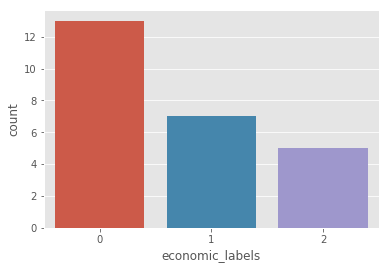

In [381]:
sns.countplot(data=df_new,x='economic_labels')

Text(0.5,1,'Population density by venue_labels')

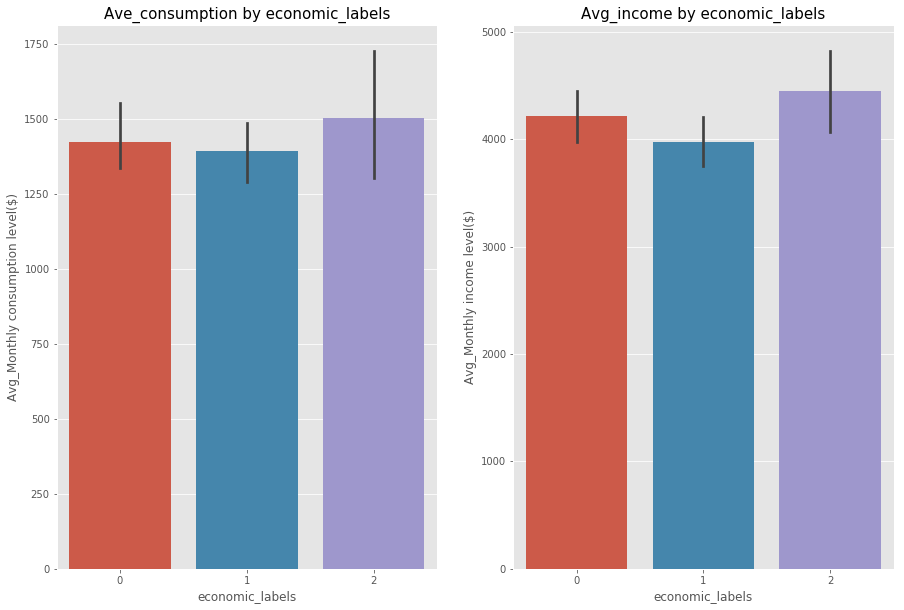

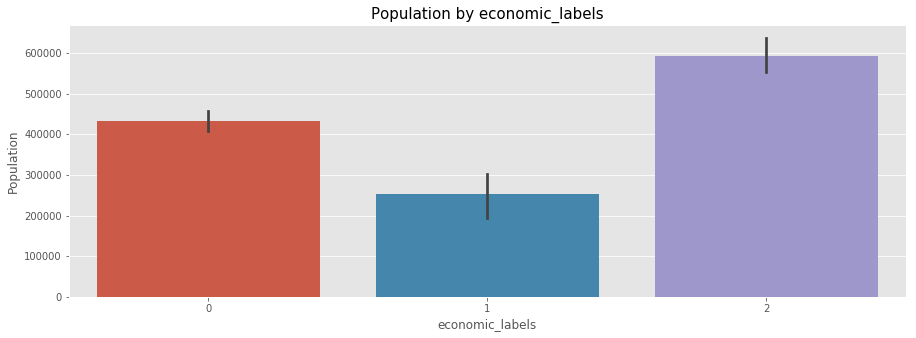

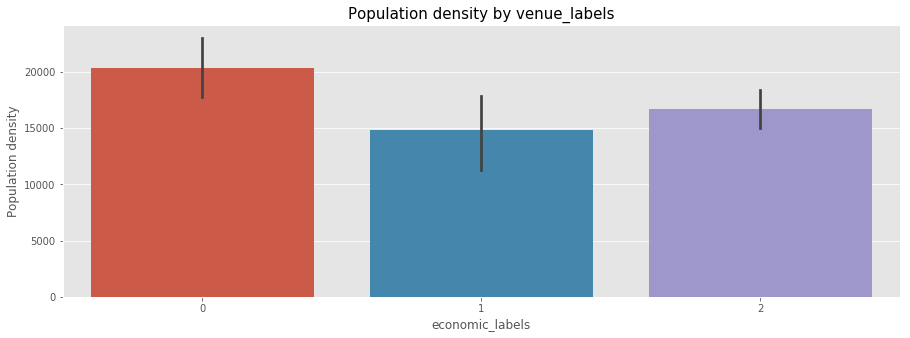

In [494]:
figure,((ax1,ax2))=plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,10)
sns.barplot(data=df_new,x='economic_labels',y='Avg_Monthly consumption level($)',ax=ax1)
sns.barplot(data=df_new,x='economic_labels',y='Avg_Monthly income level($)',ax=ax2)
ax1.set_title('Ave_consumption by economic_labels', fontsize=15)
ax2.set_title('Avg_income by economic_labels', fontsize=15)
figure, ax3=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(15,5)
sns.barplot(data=df_new,x='economic_labels',y='Population',ax=ax3)
ax3.set_title('Population by economic_labels',fontsize=15)
figure, ax4=plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15,5)
sns.barplot(data=df_new,x='economic_labels',y='Population density',ax=ax4)
plt.title('Population density by venue_labels', fontsize=15)

In [483]:
eco_as=df_new.copy()
eco_as.drop(['latitude','longitude','Venue_Cluster_Labels'],axis=1, inplace=True)
eco_as
pd.pivot_table(eco_as,index='economic_labels')

,Avg_Monthly consumption level($),Avg_Monthly income level($),Avg_Monthly rental cost($),Population,Population density
economic_labels,,,,,
0,1422.692308,4211.538462,720.000000,433231.307692,20351.615385
1,1392.857143,3971.428571,817.142857,253239.571429,14822.857143
2,1502.000000,4450.000000,760.000000,592981.800000,16681.400000


# economic_labels

- label 2 region is the most populated and wealthy (income and spending level is the highest among neighbors)
- label 1 region is the least populated and less likely to spend money than any other labels. However, their
   consumption tendency is relatively high despite of its income level.
- label 0 region is in the middle between other labels=> In terms of consumption,however, they tend to spend less   
   money given their income level compared to consumption level of label 1 region. in other words, they earn more but
   less spend compared to that of label 1. Plus, label 0 show the highest level of its population density.

# Venue_Cluster_Labels analysis

In [495]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seoul_merged['latitude'], seoul_merged['longitude'], seoul_merged['District'], seoul_merged['Venue_Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [484]:
venue_as=seoul_merged.copy()
venue_as['Population']=venue_as['Population'].str.replace(',','').astype(int)
venue_as.drop(['latitude','longitude'],axis=1,inplace=True)
venue_as['Population density']=eco_as['Population density']
pd.pivot_table(venue_as, index='Venue_Cluster_Labels')

,Avg_Monthly consumption level($),Avg_Monthly income level($),Avg_Monthly rental cost($),Population,Population density
Venue_Cluster_Labels,,,,,
0,1339.444444,4222.222222,694.444444,499119.444444,20204.111111
1,1548.000000,4130.000000,824.000000,332973.800000,14818.200000
2,1450.909091,4195.454545,773.636364,382968.090909,17800.909091


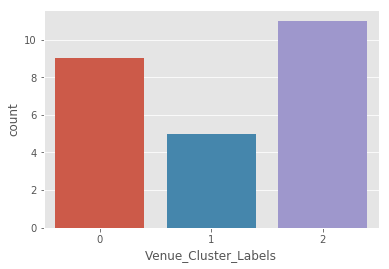

In [394]:
sns.countplot(data=venue_as,x='Venue_Cluster_Labels')

Text(0.5,1,'Population density by venue_labels')

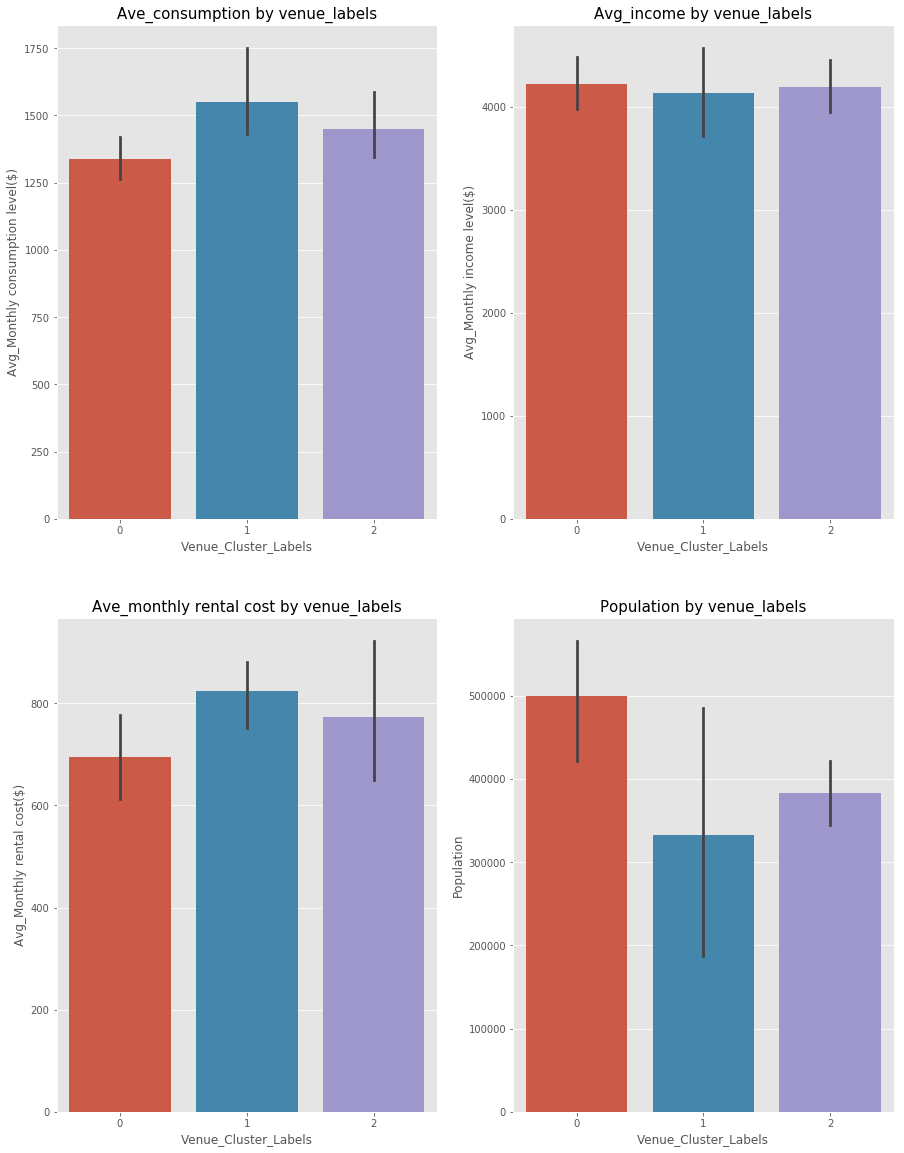

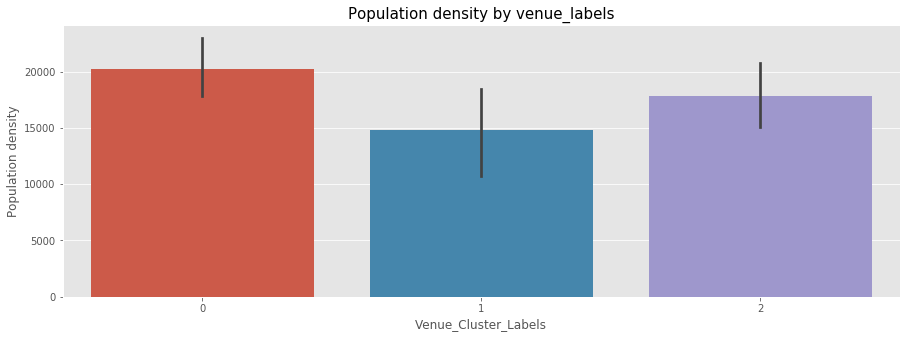

In [493]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,20)
sns.barplot(data=venue_as,x='Venue_Cluster_Labels',y='Avg_Monthly consumption level($)',ax=ax1)
sns.barplot(data=venue_as,x='Venue_Cluster_Labels',y='Avg_Monthly income level($)',ax=ax2)
sns.barplot(data=venue_as,x='Venue_Cluster_Labels',y='Avg_Monthly rental cost($)',ax=ax3)
sns.barplot(data=venue_as,x='Venue_Cluster_Labels',y='Population',ax=ax4)
ax1.set_title('Ave_consumption by venue_labels', fontsize=15)
ax2.set_title('Avg_income by venue_labels', fontsize=15)
ax3.set_title('Ave_monthly rental cost by venue_labels', fontsize=15)
ax4.set_title('Population by venue_labels', fontsize=15)
figure, ax5=plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15,5)
sns.barplot(data=venue_as,x='Venue_Cluster_Labels',y='Population density',ax=ax5)
plt.title('Population density by venue_labels', fontsize=15)


## Venue_Cluster_Labels

1. Venue 0: Venue 0 is the most populated but least spend money although they earn money than any other venue clusters. However, the rental cost is the cheapest among Venue clusters.
2. Venue 1: it spends the largest money than any other venue clust although it shows the least populated and most expensive rental cost. Venue 1 cluster spend monthly about 210 dollars more than venue 0, and even spend approximately 100 dollars more than venue 2. Interestingly, their monthly income level is the lowest even though it shows slight difference compared to other venues about 92 dollars, 65 dollars for venue0 and venue2 respectively.
3. venue 2: it is in the middle among clusters in every aspects. The majority of district belong to venue2 cluster 


In [439]:
#venue cluster 0
venue_z=venue_as[venue_as['Venue_Cluster_Labels']==0]
venue_z.drop(['Population','Population density','Avg_Monthly income level($)','Avg_Monthly consumption level($)',
                 'Avg_Monthly rental cost($)'], axis=1,inplace=True)
venue_z


/Users/phrmanager7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,District,Venue_Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Gangdong-gu, Seoul",0,Coffee Shop,Korean Restaurant,Park,Chinese Restaurant,BBQ Joint,Multiplex,Hotel,Italian Restaurant,Market,Bakery
7,"Gangseo-gu, Seoul",0,Coffee Shop,Korean Restaurant,Park,Noodle House,Hotel,Fast Food Restaurant,Café,Multiplex,Market,Campground
8,"Geumcheon-gu, Seoul",0,Coffee Shop,Korean Restaurant,BBQ Joint,Chinese Restaurant,Café,Outlet Store,Fast Food Restaurant,Hotel,Japanese Restaurant,Bakery
9,"Guro-gu, Seoul",0,Coffee Shop,Korean Restaurant,Park,BBQ Joint,Chinese Restaurant,Hotel,Dessert Shop,Market,Café,Bookstore
10,"Gwanak-gu, Seoul",0,Coffee Shop,Korean Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Bakery,BBQ Joint,Park,Burger Joint,Sushi Restaurant
14,"Jungnang-gu, Seoul",0,Coffee Shop,Korean Restaurant,Bakery,Fast Food Restaurant,Hotel,Historic Site,BBQ Joint,Noodle House,Chinese Restaurant,Park
16,"Nowon-gu, Seoul",0,Coffee Shop,Korean Restaurant,Fast Food Restaurant,Bakery,BBQ Joint,Multiplex,Park,Noodle House,Café,Japanese Restaurant
21,"Songpa-gu, Seoul",0,Korean Restaurant,Coffee Shop,Park,BBQ Joint,Chinese Restaurant,Café,Dessert Shop,Multiplex,Hotel,Concert Hall
22,"Yangcheon-gu, Seoul",0,Korean Restaurant,Coffee Shop,Park,BBQ Joint,Bakery,Hotel,Market,Restaurant,Noodle House,Fast Food Restaurant


# Venue cluster 0
###  Coffee shop, Park, BBQ,Chinese restaurant, Market, Fast Food restaurant, Bakery,Noodle House, Multiplex, Hotel
- people probably tend to spend small amount of money at venue 0 since products cost of the above venues usually cheap
  and people want to go to other places without staying long. 
  It also can inferred the number of floating population and resident many as people frequently visit Fast food  
  restaurant and market to buy groceries 

In [469]:
venue_z1=venue_z.copy().drop(['District','Venue_Cluster_Labels'],axis=1)
venue_z1.reset_index(inplace=True)
venue_z1
venue_z_v=pd.concat([venue_z1, venue_z1.T.stack().reset_index(name='new')['new']], axis=1).drop([0,1,2,3,4,5,6,7,8])
venue_z_v.new.value_counts()


Coffee Shop             9
Korean Restaurant       9
Park                    8
BBQ Joint               8
Hotel                   7
Café                    6
Bakery                  6
Chinese Restaurant      6
Fast Food Restaurant    5
Market                  4
Multiplex               4
Noodle House            4
Japanese Restaurant     3
Dessert Shop            2
Burger Joint            1
Concert Hall            1
Sushi Restaurant        1
Bookstore               1
Historic Site           1
Restaurant              1
Campground              1
Italian Restaurant      1
Outlet Store            1
Name: new, dtype: int64

In [435]:
# combine all the venue categories to count its popularity by venue cluster

#venue_zero['AllTogether'] = venue_zero['1st Most Common Venue'].astype(str).str.cat(venue_zero.,sep=',')
#cols = venue_zero.columns[3:12]
#venue_zero['combined'] = venue_zero[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#venue_zero['1st Most Common Venue']=venue_zero['1st Most Common Venue'].astype(str).str.cat(venue_zero[cols].astype(str))

In [458]:
venue_one=venue_as[venue_as['Venue_Cluster_Labels']==1]
venue_one
# Historic site, palace,korean restaurant, hotel, sushi, Japanese restaurant, plaza, art gallery, cocktail bar,French restaurant
#cultural, touristic, expensive venues: hotel, sushi, japanese restaurant, cocktail bar, French restaurant
#=> the level of willingness to pay is more likely highest

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),Venue_Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Gangnam-gu, Seoul",583446,14771/km²,5000.0,1950.0,880.0,1,Korean Restaurant,Coffee Shop,Bakery,BBQ Joint,Sushi Restaurant,Japanese Restaurant,Hotel,Noodle House,Burger Joint,Café
12,"Jongno-gu, Seoul",165344,6915/km²,4350.0,1490.0,870.0,1,Korean Restaurant,Historic Site,Café,Tea Room,Japanese Restaurant,Palace,Hotel,Coffee Shop,Plaza,Art Gallery
13,"Jung-gu, Seoul",136227,13677/km²,3450.0,1420.0,800.0,1,Korean Restaurant,Hotel,Historic Site,Noodle House,Palace,Park,Café,BBQ Joint,Plaza,Sushi Restaurant
19,"Seongbuk-gu, Seoul",475961,19364/km²,3900.0,1450.0,680.0,1,Korean Restaurant,Park,BBQ Joint,Café,Noodle House,Historic Site,Bakery,Coffee Shop,Tea Room,Palace
20,"Seongdong-gu, Seoul",303891,19364/km²,3950.0,1430.0,890.0,1,Korean Restaurant,BBQ Joint,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Cocktail Bar,Park,French Restaurant


# Venue Cluster 1

### korean restaurant, cafe, BBQ Joint, sushi, Japanese restaurant,Historic site,palace, hotel,  plaza, art gallery, cocktail bar,French restaurant

cultural, touristic, expensive venues: palace&historic site, hotel, sushi&japanese restaurant, cocktail bar, French restaurant

- It is old central part of the city as it has palaces and historic sites 
 
- the level of willingness to pay is more likely high and presumably many foreigners are likely to visit places at venue cluster 1 with group or guide

In [468]:
venue_won=venue_one.copy().drop(['District','Venue_Cluster_Labels'],axis=1)
venue_won.reset_index(inplace=True)
venue_won
venue_won_v=pd.concat([venue_won, venue_won.T.stack().reset_index(name='new')['new']], axis=1)
venue_won_v.index
venue_won_v.drop(venue_won_v.index[:30]).new.value_counts()

Korean Restaurant      5
Café                   5
BBQ Joint              4
Coffee Shop            4
Japanese Restaurant    3
Hotel                  3
Palace                 3
Historic Site          3
Sushi Restaurant       3
Noodle House           3
Park                   3
Tea Room               2
Plaza                  2
Bakery                 2
Burger Joint           1
Art Gallery            1
Chinese Restaurant     1
French Restaurant      1
Cocktail Bar           1
Name: new, dtype: int64

# Venue cluster 2
###  Coffee shop&cafe,Korean Restaurant  BBQ,Bakery, Park, Chinese restaurant, Japanese restaurant , Hotel , Historic site


- It has a variety type of venue due to many districts belong to cluster 2

- At the top5 places such as cafe and Bakery, people tend not to spend a lot of money even though they can stay long. 

- However, they may visit those places often as it is rather cheap or let people feel compfy and refreshing.

- People may enjoy looking around Venue cluster 2 since it has also historic sites including palace, museum, 
  bookstore. That can produce well mixed vibe which comes from a good combination of modern and the past architecture 
  with leisure facility like book store, museum at a lower cost. It leads people to come and go often.
- People also visit often japanese restaurant where its cost is pricey as well as Italian restaurant. 
- Tourist info Center and Hostel may suggest there are backpackers who want to see around the city and stay at a low cost.


In [586]:
venue_two=venue_as[venue_as['Venue_Cluster_Labels']==2]
venue_two.head()

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),Venue_Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Dobong-gu, Seoul",355712,17184.0,4500.0,1330.0,490.0,2,Coffee Shop,Bakery,Korean Restaurant,Fast Food Restaurant,Trail,BBQ Joint,Mountain,Café,Historic Site,Donut Shop
1,"Dongdaemun-gu, Seoul",376319,26483.0,3700.0,1310.0,510.0,2,Coffee Shop,Korean Restaurant,BBQ Joint,Park,Café,Bakery,Noodle House,Hotel,Chinese Restaurant,Dessert Shop
2,"Dongjak-gu, Seoul",419261,25643.0,4350.0,1370.0,1300.0,2,Coffee Shop,Korean Restaurant,Bakery,Park,Japanese Restaurant,BBQ Joint,Café,Chinese Restaurant,Burger Joint,Museum
3,"Eunpyeong-gu, Seoul",503243,16944.0,4300.0,1300.0,590.0,2,Historic Site,Korean Restaurant,Coffee Shop,Café,Mountain,Bakery,BBQ Joint,Trail,Tourist Information Center,Steakhouse
4,"Gangbuk-gu, Seoul",338410,14339.0,3800.0,1190.0,680.0,2,Historic Site,Coffee Shop,Bakery,Café,Korean Restaurant,Trail,Fast Food Restaurant,Park,BBQ Joint,Bookstore


In [478]:
venue_second=venue_two.copy().drop(['District','Venue_Cluster_Labels','Population','Population density'],axis=1)
venue_second.reset_index(inplace=True)
venue_second
venue_second_v=pd.concat([venue_second, venue_second.T.stack().reset_index(name='new')['new']], axis=1)
venue_second_v
venue_second_v.drop(venue_won_v.index[:45]).new.value_counts()

Café                          11
Korean Restaurant             11
BBQ Joint                     10
Bakery                        10
Coffee Shop                   10
Park                           8
Chinese Restaurant             5
Japanese Restaurant            5
Hotel                          4
Trail                          4
Historic Site                  4
Noodle House                   3
Fast Food Restaurant           2
Steakhouse                     2
Dessert Shop                   2
Burger Joint                   2
Museum                         2
Mountain                       2
Donut Shop                     1
Sake Bar                       1
Art Museum                     1
Multiplex                      1
Bookstore                      1
Indie Movie Theater            1
Gukbap Restaurant              1
Italian Restaurant             1
Palace                         1
Dive Bar                       1
Tourist Information Center     1
Hostel                         1
Name: new,

# Venue_cluster & economic mix analysis

Choose 5 good places according to combination of consumption level and economic strength
Alphabetical order has nothing to do with its degree of suggestion of investment

- Districts with venue cluster 1 & economic label 2 combination show the strongest buying power and need the most expensive investment in renting places=> "1"
- Districts with venue cluster 2 & economic label 0 combination show the second strongest buying power and need third most expensive in renting places=> "2" 
- Districs with venue cluster 1 & economic label 0 combination show the third strongest buying power but only need 680 dollars for monthly rent cost which is the second cheapest among rental cost =>"3"
- Districs with venue cluster 0 & economic label 0 combination show the second weakest buying power but it is the 
 very attractive since not only cheapest region it is but also have the fouth highest income level: potential growth in buying power is high =>"4" 
- District with venue cluster 0 & economic label 2 combination have the largest population and it has second strongest
 growth potential in buying power=>"5"
 

In sum, recommendable venue(hereafter 'v') and eco cluster(hereinafter 'eco') combinations are as follows:

1) v1,eco1="1"

2) v2,eco0="2"

3) v1,eco0="3"

4) v0,eco0="4"

5) v0,eco2="5"

6) remainders="6" => no invest



In [517]:
final_as=df_new.copy().drop(['latitude','longitude'],axis=1)
final_as['eco_potential']=final_as['Avg_Monthly income level($)']-(final_as['Avg_Monthly rental cost($)']+final_as['Avg_Monthly consumption level($)'])

pd.pivot_table(final_as, index='economic_labels',columns=['Venue_Cluster_Labels']).T
#eco_potential mean the ability how much more people can spend money after paying rent and their usual consumption
#=> it is relavant to potential buying power

economic_labels                                                0  \
                                 Venue_Cluster_Labels              
Avg_Monthly consumption level($) 0                       1326.25   
                                 1                       1450.00   
                                 2                       1467.50   
Avg_Monthly income level($)      0                       4212.50   
                                 1                       3900.00   
                                 2                       4250.00   
Avg_Monthly rental cost($)       0                        650.00   
                                 1                        680.00   
                                 2                        760.00   
Population                       0                     463145.50   
                                 1                     475961.00   
                                 2                     412933.00   
Population density               0                      23345.75   
                                 1                      19364.00   
                                 2                      18978.00   
eco_potential                    0                       2236.25   
                                 1                       1770.00   
                                 2                       2022.50   

economic_labels                                                    1  \
                                 Venue_Cluster_Labels                  
Avg_Monthly consumption level($) 0                       1190.000000   
                                 1                       1446.666667   
                                 2                       1406.666667   
Avg_Monthly income level($)      0                       3900.000000   
                                 1                       3916.666667   
                                 2                       4050.000000   
Avg_Monthly rental cost($)       0                        730.000000   
                                 1                        853.333333   
                                 2                        810.000000   
Population                       0                     258030.000000   
                                 1                     201820.666667   
                                 2                     303061.666667   
Population density               0                      19818.000000   
                                 1                      13318.666667   
                                 2                      14662.000000   
eco_potential                    0                       1980.000000   
                                 1                       1616.666667   
                                 2                       1833.333333   

economic_labels                                                2  
                                 Venue_Cluster_Labels             
Avg_Monthly consumption level($) 0                       1390.00  
                                 1                       1950.00  
                                 2                           NaN  
Avg_Monthly income level($)      0                       4312.50  
                                 1                       5000.00  
                                 2                           NaN  
Avg_Monthly rental cost($)       0                        730.00  
                                 1                        880.00  
                                 2                           NaN  
Population                       0                     595365.75  
                                 1                     583446.00  
                                 2                           NaN  
Population density               0                      17159.00  
                                 1                      14771.00  
                                 2                           NaN  
eco_potential                    0                       21

Text(0.5,1,'eco_potential by venue_labels with economic labels')

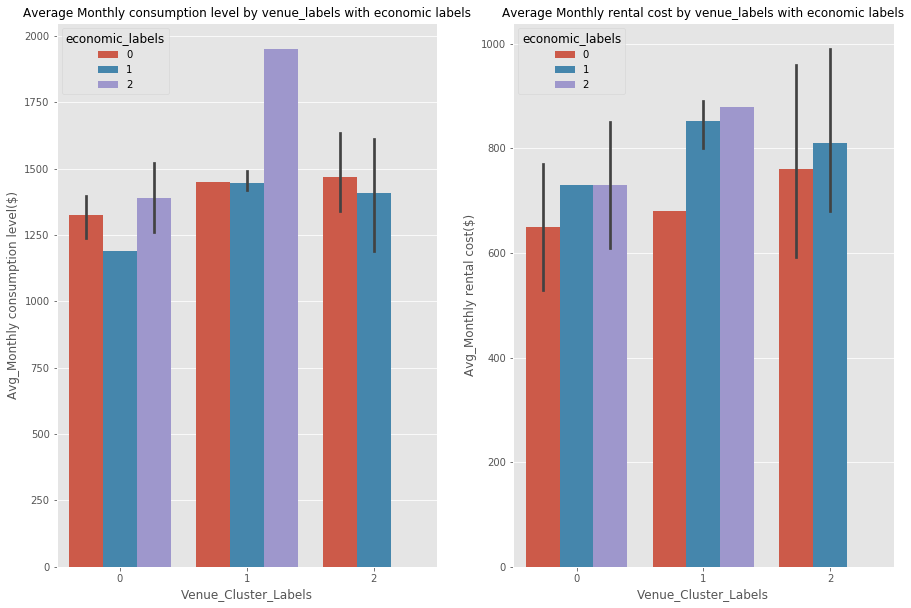

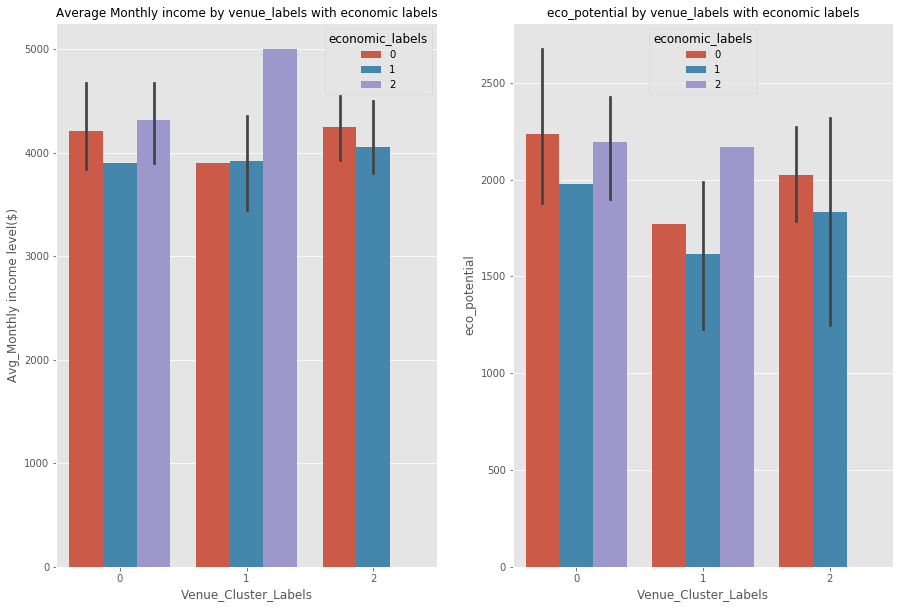

In [525]:
figure,(ax1, ax2)=plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,10)
df_new['Venue_Cluster_Labels']=df['Venue_Cluster_Labels'].copy()
sns.barplot(data=df_new,x='Venue_Cluster_Labels',y='Avg_Monthly consumption level($)',hue='economic_labels', ax=ax1)
ax1.set_title('Average Monthly consumption level by venue_labels with economic labels', fontsize=12)
sns.barplot(data=df_new,x='Venue_Cluster_Labels',y='Avg_Monthly rental cost($)',hue='economic_labels', ax=ax2)
ax2.set_title('Average Monthly rental cost by venue_labels with economic labels', fontsize=12)
figure,(ax3,ax4)=plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,10)
sns.barplot(data=df_new,x='Venue_Cluster_Labels',y='Avg_Monthly income level($)',hue='economic_labels', ax=ax3)
ax3.set_title('Average Monthly income by venue_labels with economic labels', fontsize=12)
sns.barplot(data=final_as,x='Venue_Cluster_Labels',y='eco_potential',hue='economic_labels', ax=ax4)
ax4.set_title('eco_potential by venue_labels with economic labels', fontsize=12)



In [516]:
final_as=df_new.copy().drop(['latitude','longitude'],axis=1)
final_as['eco_potential']=final_as['Avg_Monthly income level($)']-(final_as['Avg_Monthly rental cost($)']+final_as['Avg_Monthly consumption level($)'])

pd.pivot_table(final_as, index='economic_labels',columns=['Venue_Cluster_Labels']).T
#eco_potential mean the ability how much more people can spend money after paying rent and their usual consumption
#=> it is relavant to potential buying power

economic_labels                                                0  \
                                 Venue_Cluster_Labels              
Avg_Monthly consumption level($) 0                       1326.25   
                                 1                       1450.00   
                                 2                       1467.50   
Avg_Monthly income level($)      0                       4212.50   
                                 1                       3900.00   
                                 2                       4250.00   
Avg_Monthly rental cost($)       0                        650.00   
                                 1                        680.00   
                                 2                        760.00   
Population                       0                     463145.50   
                                 1                     475961.00   
                                 2                     412933.00   
Population density               0                      23345.75   
                                 1                      19364.00   
                                 2                      18978.00   
eco_potential                    0                       2236.25   
                                 1                       1770.00   
                                 2                       2022.50   

economic_labels                                                    1  \
                                 Venue_Cluster_Labels                  
Avg_Monthly consumption level($) 0                       1190.000000   
                                 1                       1446.666667   
                                 2                       1406.666667   
Avg_Monthly income level($)      0                       3900.000000   
                                 1                       3916.666667   
                                 2                       4050.000000   
Avg_Monthly rental cost($)       0                        730.000000   
                                 1                        853.333333   
                                 2                        810.000000   
Population                       0                     258030.000000   
                                 1                     201820.666667   
                                 2                     303061.666667   
Population density               0                      19818.000000   
                                 1                      13318.666667   
                                 2                      14662.000000   
eco_potential                    0                       1980.000000   
                                 1                       1616.666667   
                                 2                       1833.333333   

economic_labels                                                2  
                                 Venue_Cluster_Labels             
Avg_Monthly consumption level($) 0                       1390.00  
                                 1                       1950.00  
                                 2                           NaN  
Avg_Monthly income level($)      0                       4312.50  
                                 1                       5000.00  
                                 2                           NaN  
Avg_Monthly rental cost($)       0                        730.00  
                                 1                        880.00  
                                 2                           NaN  
Population                       0                     595365.75  
                                 1                     583446.00  
                                 2                           NaN  
Population density               0                      17159.00  
                                 1                      14771.00  
                                 2                           NaN  
eco_potential                    0                       21

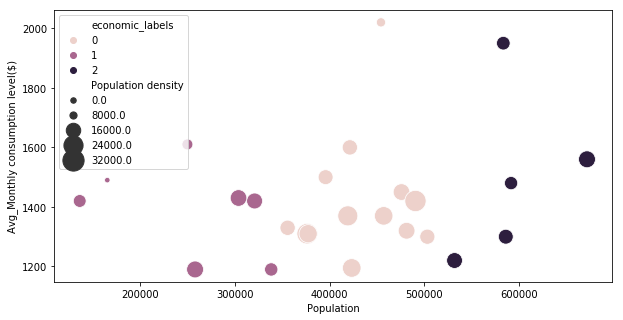

In [334]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Population',y='Avg_Monthly consumption level($)',hue='economic_labels',size='Population density',sizes=(30,450),data=df_new)

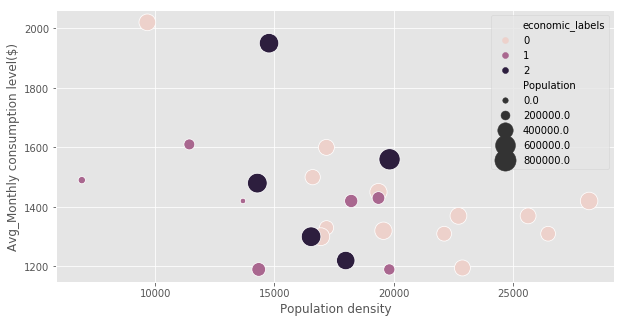

In [377]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Population density',y='Avg_Monthly consumption level($)',hue='economic_labels',size='Population',sizes=(30,450),data=df_new)

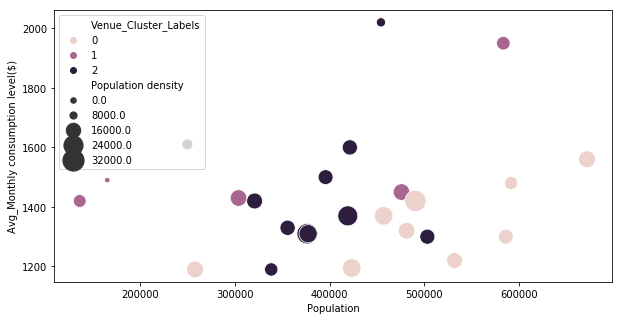

In [336]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Population',y='Avg_Monthly consumption level($)',hue='Venue_Cluster_Labels',size='Population density',sizes=(30,450),data=df_new)

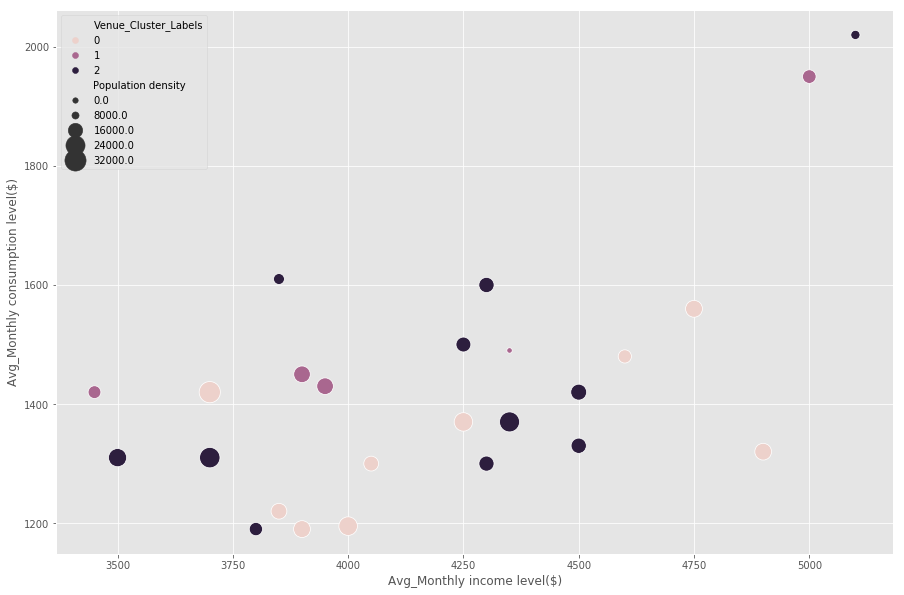

In [547]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Avg_Monthly income level($)',y='Avg_Monthly consumption level($)',hue='Venue_Cluster_Labels',size='Population density',sizes=(30,450),data=df_new)

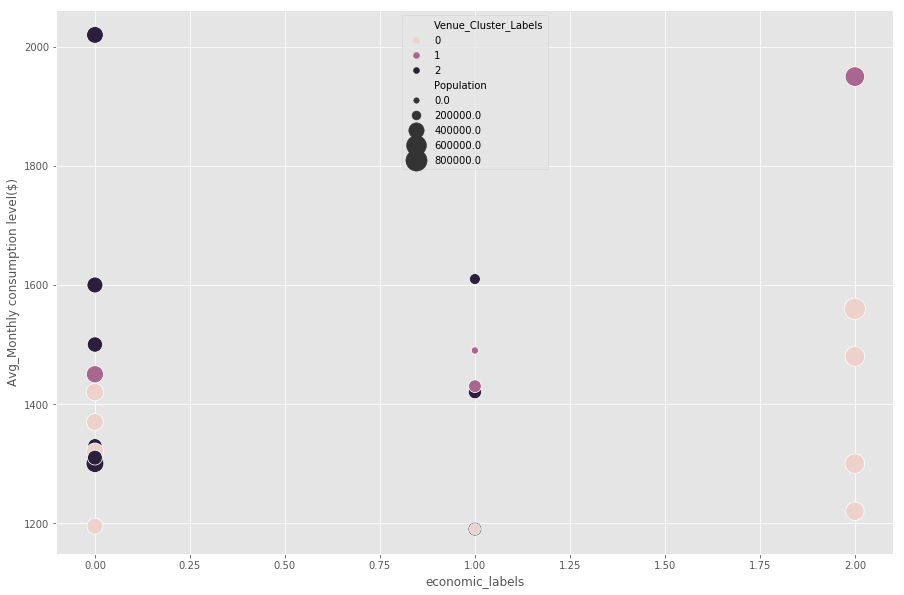

In [544]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='economic_labels',y='Avg_Monthly consumption level($)',hue='Venue_Cluster_Labels',size='Population',sizes=(30,450),data=df_new)

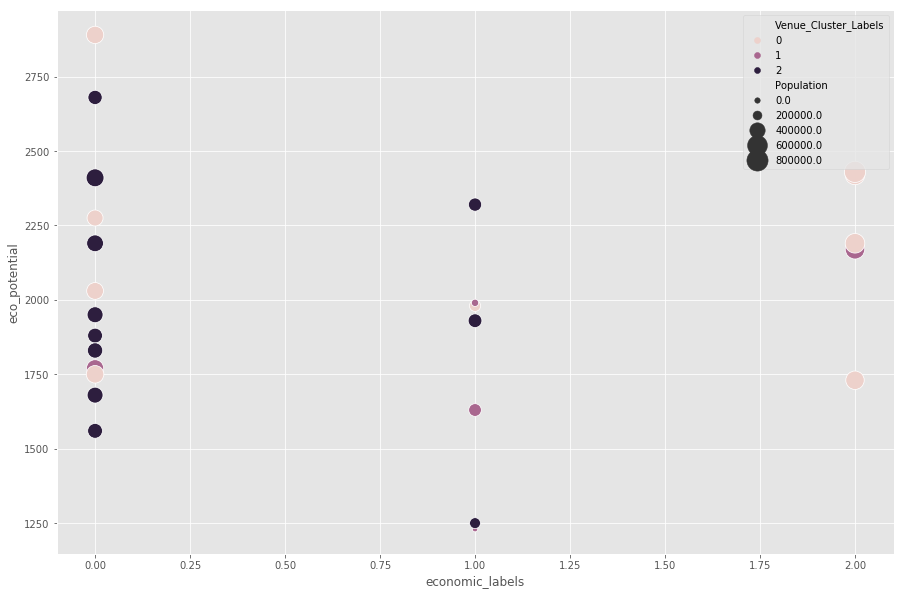

In [546]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='economic_labels',y='eco_potential',hue='Venue_Cluster_Labels',size='Population',sizes=(30,450),data=final_as)

# Final investment_suggestion_Map

In [579]:
#A
final_as.loc[(final_as['Venue_Cluster_Labels']==1)& (final_as['economic_labels']==2), 'suggestion']=1
#B
final_as.loc[(final_as['Venue_Cluster_Labels']==2)& (final_as['economic_labels']==0),'suggestion']=2
#C
final_as.loc[(final_as['Venue_Cluster_Labels']==1)& (final_as['economic_labels']==0),"suggestion"]=3
#D
final_as.loc[(final_as['Venue_Cluster_Labels']==0)& (final_as['economic_labels']==0),"suggestion"]=4
#E
final_as.loc[(final_as['Venue_Cluster_Labels']==0)& (final_as['economic_labels']==2),"suggestion"]=5

In [585]:
final_as['longitude']=df_new['longitude']
final_as['latitude']=df_new['latitude']
final_fill=final_as.fillna(6)# no invest
final_fill

,District,Population,Population density,Avg_Monthly income level($),Avg_Monthly consumption level($),Avg_Monthly rental cost($),economic_labels,Venue_Cluster_Labels,eco_potential,suggestion,longitude,latitude
0,"Dobong-gu, Seoul",355712.0,17184.0,4500.0,1330.0,490.0,0,2,2680.0,2,127.030596,37.666487
1,"Dongdaemun-gu, Seoul",376319.0,26483.0,3700.0,1310.0,510.0,0,2,1880.0,2,127.055106,37.583186
2,"Dongjak-gu, Seoul",419261.0,25643.0,4350.0,1370.0,1300.0,0,2,1680.0,2,126.954736,37.503056
3,"Eunpyeong-gu, Seoul",503243.0,16944.0,4300.0,1300.0,590.0,0,2,2410.0,2,126.928858,37.616405
4,"Gangbuk-gu, Seoul",338410.0,14339.0,3800.0,1190.0,680.0,1,2,1930.0,6,127.009235,37.640495
5,"Gangdong-gu, Seoul",481332.0,19574.0,4900.0,1320.0,690.0,0,0,2890.0,4,127.141903,37.547070
6,"Gangnam-gu, Seoul",583446.0,14771.0,5000.0,1950.0,880.0,2,1,2170.0,1,127.050775,37.500590
7,"Gangseo-gu, Seoul",591653.0,14281.0,4600.0,1480.0,700.0,2,0,2420.0,5,126.832201,37.558340
8,"Geumcheon-gu, Seoul",258030.0,19818.0,3900.0,1190.0,730.0,1,0,1980.0,6,126.901626,37.460096
9,"Guro-gu, Seoul",457131.0,22720.0,4250.0,1370.0,850.0,0,0,2030.0,4,126.859183,37.498554


In [584]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
fclusters=6
# set color scheme for the clusters
x = np.arange(fclusters)
ys = [i+x+(i*x)**2 for i in range(fclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_fill['latitude'], final_fill['longitude'], final_fill['District'], final_fill['suggestion']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters